In [2]:
import copy
import igraph
import pandas as pd

full_map = igraph.Graph.Read_GraphML("/content/jupyter/mta/data/processed/stationgraph/mta-elevators-w-station-connections.graphml")

/opt/conda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  """


In [4]:
clusters = full_map.clusters(mode="WEAK")
print(f"Number of clusters (should be 1): {len(clusters)}")
print("Sub Cluster Sizes:")
for cluster in clusters:
    print(len(cluster))

Number of clusters (should be 1): 14
Sub Cluster Sizes:
1785
9
7
4
7
9
11
5
11
9
11
9
21
21


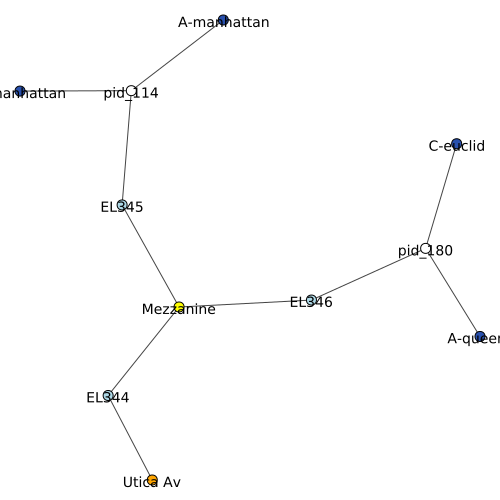

In [7]:
SUB_CLUSTER = 10
graph_to_display = full_map.subgraph(clusters[SUB_CLUSTER])

layout = graph_to_display.layout("fr")
visual_style = {}
visual_style["vertex_size"] = 10
visual_style["layout"] = layout
visual_style["bbox"] = (500, 500)
visual_style["margin"] = 20
igraph.plot(graph_to_display, **visual_style)

In [2]:
def is_line(v, line):
    return v["node_type"] == "Platform" and f"{line}-" in v["id"]

def printit(g, v):
    print(f"{full_map.vs[v]['node_type']} - {full_map.vs[v]['id']} ")

In [9]:
########################################
# This allows you to enter a node name
# and explore up to a specified depth.
# It's useful for allowing you to see
# what connections are there vs what
# you expected.
#
# The cell below allows you to graph the
# results visually.
########################################
CHECK = "217N"
DEPTH = 10
origin = None
for v in full_map.vs:
    if CHECK in v["name"]:
        print(v)
        origin = v.index
        break

i = 0
visited = {origin}
to_visit = visited.copy()
while len(to_visit) > 0:
    i += 1
    for v in to_visit:
        next_v = set()
        for nv in full_map.neighbors(v):
            if nv not in visited:
                visited.add(nv)
                next_v.add(nv)
        to_visit = next_v
    if i > DEPTH:
        break
print(visited)
for v in visited:
    print(full_map.vs[v])

igraph.Vertex(<igraph.Graph object at 0x7f4e7af346d8>, 454, {'id': '217N', 'name': '217N', 'label': '217N', 'node_type': 'GTFS Stop ID', 'station': '174 St', 'color': 'darkgrey'})
{448, 450, 452, 454, 456, 458, 204, 460, 462, 558, 464, 560, 562, 1900, 564, 444, 446}
igraph.Vertex(<igraph.Graph object at 0x7f4e7af346d8>, 448, {'id': '214N', 'name': '214N', 'label': '214N', 'node_type': 'GTFS Stop ID', 'station': 'Bronx Park East', 'color': 'darkgrey'})
igraph.Vertex(<igraph.Graph object at 0x7f4e7af346d8>, 450, {'id': '215N', 'name': '215N', 'label': '215N', 'node_type': 'GTFS Stop ID', 'station': 'E 180 St', 'color': 'darkgrey'})
igraph.Vertex(<igraph.Graph object at 0x7f4e7af346d8>, 452, {'id': '216N', 'name': '216N', 'label': '216N', 'node_type': 'GTFS Stop ID', 'station': 'West Farms Sq - E Tremont Av', 'color': 'darkgrey'})
igraph.Vertex(<igraph.Graph object at 0x7f4e7af346d8>, 454, {'id': '217N', 'name': '217N', 'label': '217N', 'node_type': 'GTFS Stop ID', 'station': '174 St', 'c

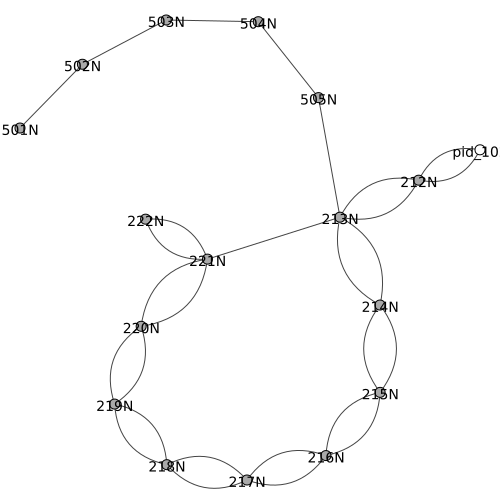

In [10]:
graph_to_display = full_map.subgraph(visited)

layout = graph_to_display.layout("fr")
visual_style = {}
visual_style["vertex_size"] = 10
visual_style["layout"] = layout
visual_style["bbox"] = (500, 500)
visual_style["margin"] = 20
igraph.plot(graph_to_display, **visual_style)